# Packages

In [300]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize
from sklearn import cluster, preprocessing
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import set_matplotlib_formats

# Dataframe retrieval

In [301]:
# open Budget dataframe
with open('static_dic/budgets_idf.json') as file:
    data = json.load(file)

df_budget = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_budget.set_index('code', inplace=True)

In [302]:
# open Chomage dataframe
with open('static_dic/chomage.json') as file:
    data = json.load(file)

df_chomage = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_chomage.set_index('code', inplace=True)

In [303]:
# open Partis dataframe
with open('static_dic/partisidf.json') as file:
    data = json.load(file)

df_partis = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_partis.set_index('code', inplace=True)

In [304]:
# open Logmement dataframe
with open('static/logement.json') as file:
    data = json.load(file)

df_logement = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_logement.set_index('inseecode', inplace=True)

In [305]:
# open Bac dataframe
with open('static_dic/Bac_js2.json') as file:
    data = json.load(file)

df_bac = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_bac.set_index('Code', inplace=True)

df_bac.columns

Index(['NbLycees_2008', 'NbLycees_2009', 'NbLycees_2010', 'NbLycees_2011',
       'NbLycees_2012', 'NbLycees_2013', 'NbLycees_2014', 'NbLycees_2015',
       'NbLycees_2016', 'NbLycees_2017', 'Privé_2008', 'Privé_2009',
       'Privé_2010', 'Privé_2011', 'Privé_2012', 'Privé_2013', 'Privé_2014',
       'Privé_2015', 'Privé_2016', 'Privé_2017', 'Public_2008', 'Public_2009',
       'Public_2010', 'Public_2011', 'Public_2012', 'Public_2013',
       'Public_2014', 'Public_2015', 'Public_2016', 'Public_2017',
       'Resultat_2008_(50)', 'Resultat_2008_(50-70)', 'Resultat_2008_(70-80)',
       'Resultat_2008_(80-90)', 'Resultat_2008_(90)', 'Resultat_2009_(50)',
       'Resultat_2009_(50-70)', 'Resultat_2009_(70-80)',
       'Resultat_2009_(80-90)', 'Resultat_2009_(90)', 'Resultat_2010_(50)',
       'Resultat_2010_(50-70)', 'Resultat_2010_(70-80)',
       'Resultat_2010_(80-90)', 'Resultat_2010_(90)', 'Resultat_2011_(50)',
       'Resultat_2011_(50-70)', 'Resultat_2011_(70-80)',
       'Resul

In [306]:
# open Siren dataframe
with open('static_dic/sirene_93_01_01_18.json') as file:
    data = json.load(file)

df_siren = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_siren.set_index('Insee', inplace=True)

df_siren.columns

Index(['ETI_rate', 'Employee_0_rate', 'Employee_1000_1999_rate',
       'Employee_100_199_rate', 'Employee_10_19_rate', 'Employee_1_2_rate',
       'Employee_2000_4999_rate', 'Employee_200_249_rate',
       'Employee_20_49_rate', 'Employee_250_499_rate', 'Employee_3_5_rate',
       'Employee_5000_9999_rate', 'Employee_500_999_rate',
       'Employee_50_99_rate', 'Employee_6_9_rate', 'Employee_over_10000_rate',
       'Firms_Nb', 'GE_rate', 'PME_rate'],
      dtype='object')

In [307]:
# open population dataframe
with open('static_dic/population.json') as file:
    data = json.load(file)

df_population = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_population.set_index('code', inplace=True)

df_population.columns

Index(['Pop1999', 'Pop2006', 'Pop2007', 'Pop2008', 'Pop2009', 'Pop2010',
       'Pop2011', 'Pop2012', 'Pop2013', 'Pop2014', 'Pop2015', 'nom'],
      dtype='object')

# Full dataframe preprocessing

In [308]:
# concatenate dataframes 
df = pd.concat([df_budget, df_chomage, df_logement, df_partis, df_population], axis=1, join='outer')

In [309]:
# We drop NAs for the analysis of parties
print('Before drop NA partis :',  df.shape)
df = df[df['partis.2001'] != 'NA']
df = df[df["partis.2008"] != 'NA']
df = df[df["partis.2014"] != 'NA']
print('After drop NA partis :',  df.shape)

# Encode categorical features
encoder = {"partis.2001" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8},
            "partis.2008" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8},
           "partis.2014" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8}
          }

df.replace(encoder, inplace=True)
df.head()

Before drop NA partis : (1302, 339)
After drop NA partis : (511, 339)


,budget_2000,budget_2001,budget_2002,budget_2003,budget_2004,budget_2005,budget_2006,budget_2007,budget_2008,budget_2009,...,Pop2007,Pop2008,Pop2009,Pop2010,Pop2011,Pop2012,Pop2013,Pop2014,Pop2015,nom
75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2193030.0,2211297.0,2234105.0,2243833.0,2249975.0,2240621.0,2229621.0,2220445.0,2206488.0,PARIS
75056,9.437445e+09,9.947465e+09,1.086575e+10,1.254907e+10,1.223939e+10,1.282783e+10,1.515312e+10,1.490108e+10,1.411667e+10,1.488024e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17915.0,17440.0,17614.0,17308.0,17443.0,17100.0,17022.0,16717.0,16545.0,PARIS 1ER ARRONDISSEMENT
75102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21745.0,21793.0,22400.0,23009.0,22927.0,22390.0,21741.0,21263.0,20796.0,PARIS 2E ARRONDISSEMENT
75103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34576.0,34824.0,35655.0,35652.0,36120.0,35991.0,35666.0,35077.0,35049.0,PARIS 3E ARRONDISSEMENT


In [310]:
# Select the most imprtant cities
df = df[df['Pop2015'] > 50]

# get rid of NaNs
#df = df.dropna(axis=0, how='any')

In [311]:
df.head(10)

,budget_2000,budget_2001,budget_2002,budget_2003,budget_2004,budget_2005,budget_2006,budget_2007,budget_2008,budget_2009,...,Pop2007,Pop2008,Pop2009,Pop2010,Pop2011,Pop2012,Pop2013,Pop2014,Pop2015,nom
75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2193030.0,2211297.0,2234105.0,2243833.0,2249975.0,2240621.0,2229621.0,2220445.0,2206488.0,PARIS
75101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17915.0,17440.0,17614.0,17308.0,17443.0,17100.0,17022.0,16717.0,16545.0,PARIS 1ER ARRONDISSEMENT
75102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21745.0,21793.0,22400.0,23009.0,22927.0,22390.0,21741.0,21263.0,20796.0,PARIS 2E ARRONDISSEMENT
75103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34576.0,34824.0,35655.0,35652.0,36120.0,35991.0,35666.0,35077.0,35049.0,PARIS 3E ARRONDISSEMENT
75104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28572.0,27977.0,28192.0,28012.0,27887.0,27769.0,27335.0,26796.0,27146.0,PARIS 4E ARRONDISSEMENT
75105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62664.0,62143.0,61531.0,60938.0,60800.0,60179.0,60273.0,60030.0,59333.0,PARIS 5E ARRONDISSEMENT
75106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45332.0,44322.0,43143.0,43451.0,43880.0,43224.0,43479.0,43134.0,42428.0,PARIS 6E ARRONDISSEMENT
75107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57410.0,57082.0,57442.0,57974.0,57786.0,57092.0,56325.0,55486.0,54133.0,PARIS 7E ARRONDISSEMENT
75108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39165.0,38702.0,40278.0,41280.0,40589.0,38749.0,39175.0,38257.0,36694.0,PARIS 8E ARRONDISSEMENT
75109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58632.0,59157.0,60275.0,60139.0,60120.0,59474.0,59427.0,59389.0,59408.0,PARIS 9E ARRONDISSEMENT


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 75000 to 95690
Columns: 339 entries, budget_2000 to nom
dtypes: float64(338), object(1)
memory usage: 1.3+ MB


In [313]:
#print(df.dtypes)
#df.describe()

# Feature sets definition

In [314]:
features_all = list(df.columns)

features_recent = ['partis.2014', 
            'chomage', 
            'housing',
            'main_res', 
            'portion_hlm_tenant',
            'budget_2015', 
            'd1.2_2015', 
            'd1.3_2015', 
            'd1.4_2015', 
            'd1.5_2015', 
            'd1_2015',
            'd2.1_2015',
            'd2.2_2015',
            'd2.3_2015',
            'd2_2015',
            'depenses_2015',
            'r1.1_2015',
            'r1.2_2015',
            'r1.3_2015',
            'r1_2015',
            'r2.1_2015',
            'r2.2_2015',
            'r2_2015',
            'recettes_2015',
            'NbLycees_2017',
            'Privé_2017',
            'Public_2017',
            'Resultat_2017_(50)',
            'Resultat_2017_(50-70)',
            'Resultat_2017_(70-80)',
            'Resultat_2017_(80-90)',
            'Resultat_2017_(90)'
           ]

features_2001 = ['Pop1999',
            'partis.2001', 
            'budget_2001', 
            'd1.2_2001', 
            'd1.3_2001', 
            'd1.4_2001', 
            'd1.5_2001', 
            'd1_2001',
            'd2.1_2001',
            'd2.2_2001',
            'd2.3_2001',
            'd2_2001',
            'depenses_2001',
            'r1.1_2001',
            'r1.2_2001',
            'r1.3_2001',
            'r1_2001',
            'r2.1_2001',
            'r2.2_2001',
            'r2_2001',
            'recettes_2001',
           ]

features_2008 = ['Pop2008',
            'partis.2008', 
            'budget_2008', 
            'd1.2_2008', 
            'd1.3_2008', 
            'd1.4_2008', 
            'd1.5_2008', 
            'd1_2008',
            'd2.1_2008',
            'd2.2_2008',
            'd2.3_2008',
            'd2_2008',
            'depenses_2008',
            'r1.1_2008',
            'r1.2_2008',
            'r1.3_2008',
            'r1_2008',
            'r2.1_2008',
            'r2.2_2008',
            'r2_2008',
            'recettes_2008',
           ]

features_2014 = ['Pop2014',
            'partis.2014', 
            'budget_2014', 
            'd1.2_2014', 
            'd1.3_2014', 
            'd1.4_2014', 
            'd1.5_2014', 
            'd1_2014',
            'd2.1_2014',
            'd2.2_2014',
            'd2.3_2014',
            'd2_2014',
            'depenses_2014',
            'r1.1_2014',
            'r1.2_2014',
            'r1.3_2014',
            'r1_2014',
            'r2.1_2014',
            'r2.2_2014',
            'r2_2014',
            'recettes_2014',
           ]

features_cluster = ['Pop2014',
            'partis.2014', 
            'budget_2014', 
            'chomage'
           ]

### Reminder on Budget labels
* __d1 : dépenses de fonctionnement__
    - d1.1 : achats et autres charges externes
    - d1.2 : charges de personnel
    - d1.3 : charges financières
    - d1.4 : contingents
    - d1.5 : subventions versées
* __d2 : emplois d'investissements__
    - d2.1 : charges a répartir
    - d2.2 : depenses d’equipement
    - d2.3 : remboursement d'emprunts et dettes assimilées
* __r1 : total des produits de fonctionnement__
    - r1.1 : autres impôts et taxes
    - r1.2 : dotation globale de fonctionnement
    - r1.3 : impots locaux
* __r2 : total des ressources d'investissement__
    - r2.1 : emprunts bancaires et dettes assimilées
    - r2.2 : subventions reçues
    

# Correlation Analysis

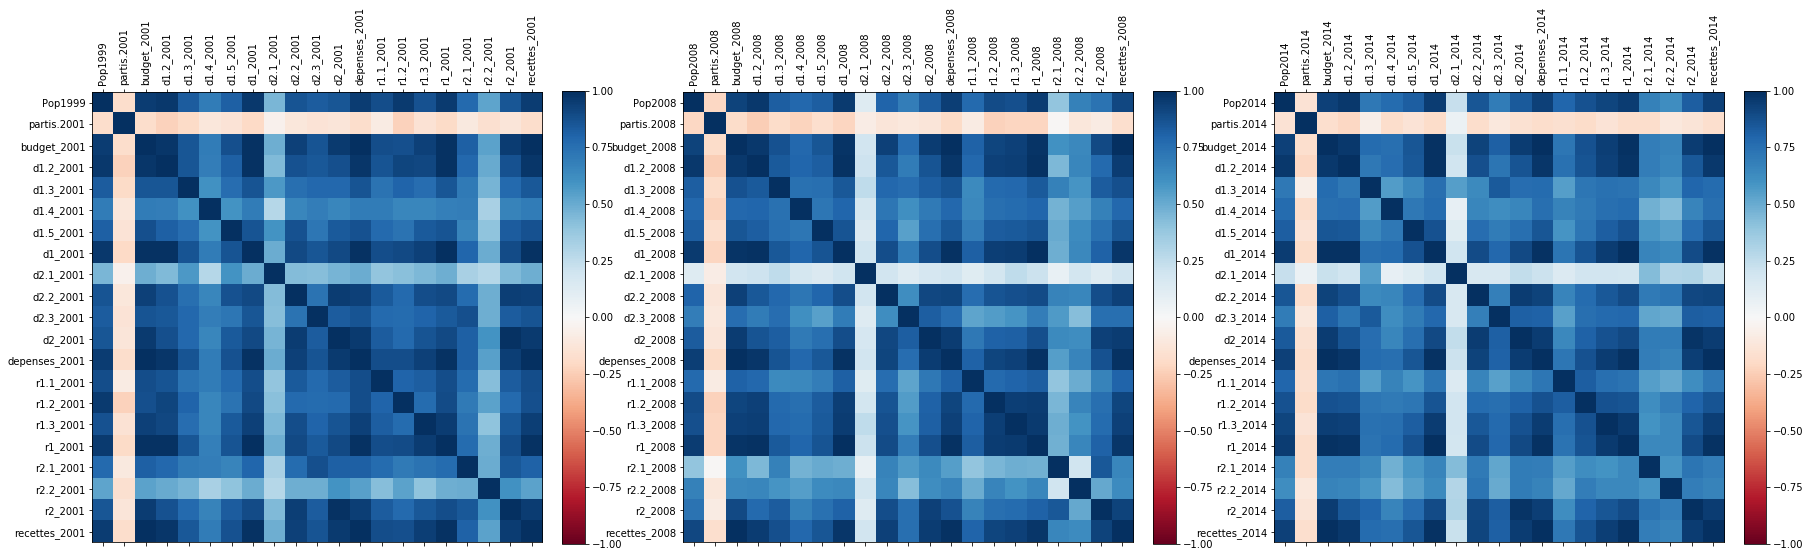

In [267]:
# selection of features for analysis
features_selected = [features_2001, features_2008, features_2014]
l = len(features_selected)

# correlation between features, for years 2001, 2008 and 2014
fig = plt.figure(figsize=(30,20))

for i,feature in enumerate(features_selected):
    correlations = df[feature].corr(method='pearson')
    ax = fig.add_subplot(100+10*l+1+i)
    cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    ticks = np.arange(0,len(feature),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(feature, rotation='vertical')
    ax.set_yticklabels(feature)
plt.show()

# Clustering

In [315]:
# Clean NaN's before clustering 
df = df.drop(['nom'], axis=1, errors='ignore')
df = df.dropna(axis=0, how='any')
df.info()

# Note : if "Index : 0 entries" is printed under this box, run again the "complete dataframe preprocessing" block

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 77001 to 95690
Columns: 338 entries, budget_2000 to Pop2015
dtypes: float64(338)
memory usage: 1.2+ MB


In [317]:
# choose one feature set
features_selected = features_cluster
n_features = len(features_selected)

#data = df[features_selected].values
print('NaN remaining ? :', np.isnan(data).any())

NaN remaining ? : False


In [318]:
# Standardize data
scaler = preprocessing.StandardScaler()
data_s = scaler.fit_transform(data)

# Normalize data (be careful with outliers)
normalizer = preprocessing.MinMaxScaler()
data_n = normalizer.fit_transform(data)

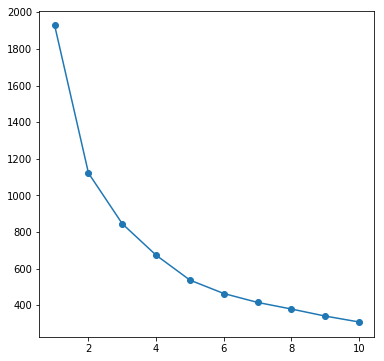

In [319]:
# Elbow analysis to find optimal number of clusters (k)
# ie k that minimizes the sum of squared distances of samples to their closest cluster center

data = data_s

k_range = np.arange(1,11)
clusters_error = []

for k in k_range:
    cluster_k = cluster.KMeans(n_clusters=k)
    cluster_k.fit(data)
    clusters_error.append(cluster_k.inertia_)

plt.figure(figsize=(6,6))
plt.plot(k_range, clusters_error, marker='o')

In [320]:
# Run KMeans on one of the scaled data 
data = data_s

kmeans = cluster.KMeans(n_clusters=4, random_state=0).fit(data)
print(kmeans.labels_)

[0 0 1 2 1 2 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 2 0 0 0 1 0 2 0
 0 0 0 2 2 1 0 0 0 0 2 1 2 1 0 0 0 0 3 2 1 1 0 1 2 0 2 0 0 1 1 1 0 1 0 1 0
 2 0 0 0 0 0 1 1 2 2 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 2 1 0 0 1 2 0
 0 0 0 0 2 0 0 0 0 1 2 0 0 0 2 2 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 2 1 0
 1 0 1 1 2 3 0 0 0 1 0 0 2 0 0 0 2 0 3 0 2 2 0 2 0 0 1 0 2 0 0 3 0 2 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 1 2 1 0 0 1 0 0 2 2 2 0 0 2 0 1 2 0 0 0 0
 3 1 0 0 0 0 0 0 3 1 0 0 0 2 0 0 0 1 0 3 0 0 0 0 1 2 1 0 1 1 0 1 0 1 0 2 0
 0 1 1 2 0 1 0 0 0 1 0 0 0 2 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3
 3 2 3 2 0 2 3 3 2 2 3 3 3 1 0 2 2 3 3 2 3 3 2 2 2 0 0 2 3 3 3 3 3 2 3 3 3
 2 2 0 2 2 2 3 2 1 3 3 3 3 1 2 1 3 3 3 3 3 0 2 2 0 3 2 0 3 2 1 3 3 3 1 1 2
 3 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 3 0 0 0 3 2 0 0 0 0 2 0 1 0 0 2 1 1 1 3 0
 0 0 0 0 0 2 1 2 0 2 1 2 2 2 0 1 2 0 0 3 0 1 3 0 2 0 0 2 0 0 1 0 1 1 0 1 0
 0 0 1 0 2 2 0 0 0 2 0 2 1 0 2 0 0 0 0 2 2 0 1 0 2 3 0 2 0 2 0 0 1 1 1 0 1
 0]


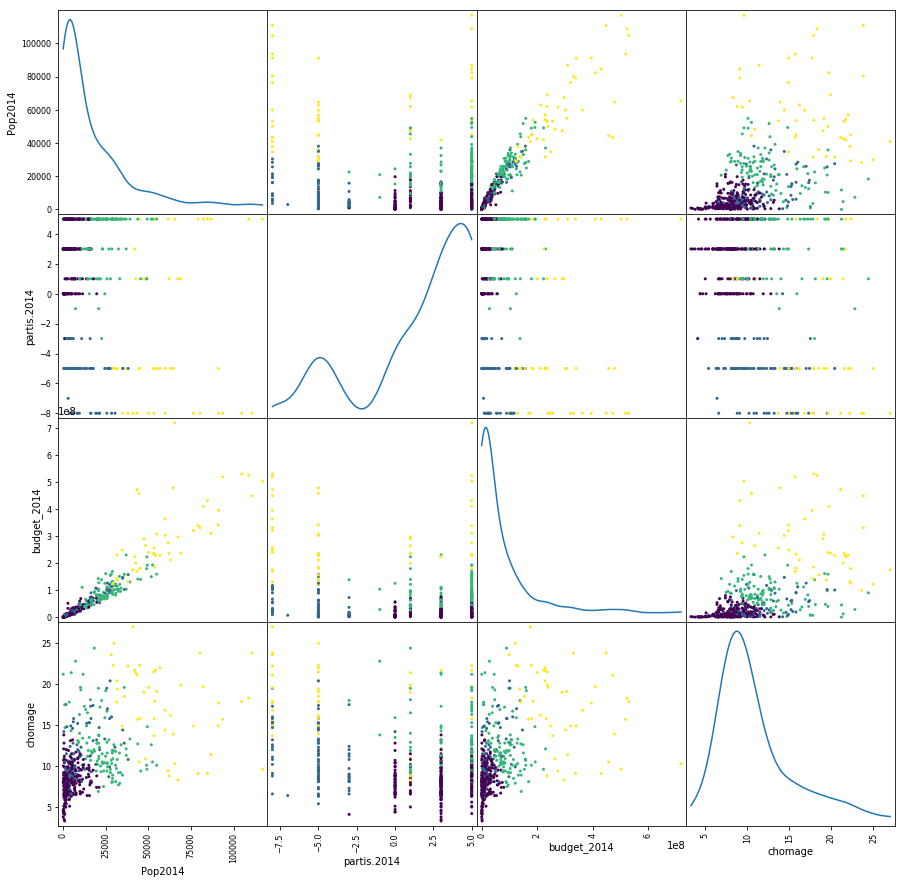

In [323]:
# Plot 2D
from pandas.plotting import scatter_matrix

scatter_matrix(df[features_selected], alpha=1,
               figsize=(15, 15), diagonal='kde', c=kmeans.labels_);

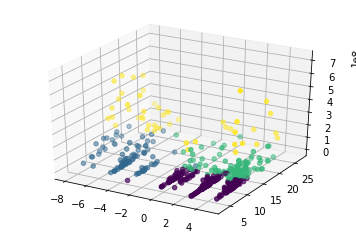

In [293]:
# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["partis.2014"], df["chomage"], df['budget_2014'], c=kmeans.labels_)

## Mini CR de la dernière fois, les pistes à explorer sont :

- etudier temporalité des correlations
- voir résultats attendus et surprenants dans l'analyse des correlation (lire articles de socio, étdues des votants... comme base de comaraison)
- heatmap dans les plot des features, quitte a faire des regressions, afin de faire apparaitres des tendances

- Début Mai : isoler un bout de code (500-1000 lignes) a envoyer aux potes à Jospeh qui peuvent corriger/améliorer notre façon de coder
- Début Mai : Appeler chercheurs Science Po, Universitaires en socio, etc pour discuter des corrélations, éventuellement qu'ils nous parlent d'une question non-résolu à laquelle on pourrait contribuer avec nos données

- Fin Mai : Visualisation indépendantes des chercheurs (à nous) 
- Fin du projet : un beau code, un rapport
- Fin projet : une belle analyse avec des visu et des inputs de chercheurs et sociologues